In [15]:
from disaggregator import config, data, spatial, temporal, plot
import pandas as pd
import matplotlib.pyplot as plt

# Power by 'Time Use Survey' (ZVE)

Get spatial data in [MWh] that shall be disaggregated temporally

In [16]:
df_spat = spatial.disagg_households_power('population', weight_by_income=True) * 1e3
df_spat

nuts3
DE111    1.162713e+06
DE112    6.942694e+05
DE113    9.678796e+05
DE114    4.479099e+05
DE115    9.955292e+05
             ...     
DEG0K    1.156523e+05
DEG0L    1.437641e+05
DEG0M    1.262784e+05
DEG0N    5.985672e+04
DEG0P    1.821599e+05
Name: value, Length: 401, dtype: float64

Then load the temporal distribution keys based on the ZVE:

In [17]:
df_temp = (pd.read_csv(config.data_out('ZVE_timeseries_AllRegions_2015.csv'),
                       engine='c', index_col=0, parse_dates=True,
                       infer_datetime_format=True)
              .pipe(data.transpose_spatiotemporal))
df_temp

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
DE111,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000132,0.000121,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE112,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000132,0.000121,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE113,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000131,0.000120,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE114,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000131,0.000120,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE115,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000132,0.000121,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0K,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000131,0.000121,...,0.00011,0.000114,0.000138,0.000174,0.000188,0.000191,0.000184,0.000174,0.000131,0.000079
DEG0L,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000131,0.000121,...,0.00011,0.000114,0.000138,0.000174,0.000188,0.000191,0.000184,0.000173,0.000131,0.000079
DEG0M,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000131,0.000121,...,0.00011,0.000115,0.000138,0.000174,0.000188,0.000191,0.000184,0.000173,0.000131,0.000079
DEG0N,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000132,0.000122,...,0.00011,0.000114,0.000138,0.000173,0.000188,0.000191,0.000184,0.000174,0.000131,0.000079


The function `temporal.disagg_temporal()` needs two inputs:
1. **a spatial dataset**  
    either as `pd.Series` or `pd.DataFrame`: in both cases _NUTS-3-index'ed_


2. **a temporal dataset**  
    if passed as `pd.DataFrame`: _NUTS-3-index'ed_  
    if passed as `pd.Series`: _pd.DateTimeIndex'ed_

Pre-check:
* Both `df_spat` and `df_temp` are `pd.DataFrame`s
* Both have NUTS-3-indices.

So now we can directly perfom the disaggregation:

In [18]:
df_elc_tempo_ZVE = temporal.disagg_temporal(df_spat, df_temp)
df_elc_tempo_ZVE

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
DE111,62.243096,52.126232,49.009933,47.478387,55.075697,88.759143,155.867967,167.129661,152.972696,140.248072,...,127.884639,129.204791,158.526482,200.867852,219.436620,222.137802,214.089070,202.246599,152.218293,92.287071
DE112,37.168059,31.126070,29.265026,28.350340,32.887385,53.002707,93.078833,99.804531,91.436438,83.775718,...,76.361392,77.085460,94.527074,119.874115,131.041281,132.655255,127.849916,120.778150,90.901379,55.110654
DE113,51.814067,43.391955,40.797721,39.522726,45.847246,73.887590,129.753235,139.128452,127.261214,116.463387,...,106.455208,107.554479,131.965348,167.266655,182.672132,184.921195,178.221492,168.363208,126.716053,76.825033
DE114,23.977962,20.080572,18.880060,18.290048,21.216790,34.192800,60.045343,64.345888,58.816884,53.726737,...,49.264726,49.815212,61.112960,77.477955,84.534197,85.574870,82.474331,77.912231,58.639579,35.551998
DE115,53.291912,44.630502,41.962479,40.651284,47.155769,75.994112,133.450182,143.091755,131.013930,120.206915,...,109.496528,110.672853,135.776451,171.978498,187.875086,190.187102,183.295229,173.155909,130.324063,79.013796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0K,6.184371,5.181835,4.872785,4.721075,5.474694,8.816397,15.475622,16.567142,15.158041,13.976416,...,12.720572,13.186998,15.955136,20.100347,21.788890,22.046708,21.243819,20.067565,15.106155,9.162467
DEG0L,7.686875,6.441060,6.056989,5.868472,6.805049,10.958076,19.234237,20.584787,18.828011,17.372849,...,15.812597,16.418333,19.858781,24.989838,27.089108,27.400320,26.402020,24.940035,18.774261,11.387739
DEG0M,6.750356,5.656935,5.319789,5.154349,5.976532,9.622400,16.888233,18.073631,16.527329,15.258049,...,13.889377,14.536011,17.456427,21.962006,23.783845,24.056387,23.178993,21.895219,16.482779,9.998707
DEG0N,3.200796,2.681904,2.521948,2.443429,2.833481,4.563034,8.009632,8.584622,7.885118,7.298413,...,6.583629,6.802883,8.234557,10.374306,11.273542,11.410698,10.995180,10.386395,7.818490,4.742183


We see that the data has successfully been disaggregated.  
However, regions are in rows and time-steps are in columns -- this is not really intuitive. Better would be the other way round, right? We can achieve this by passing `time_indexed=True` to give us a transponed version:

In [19]:
df_elc_tempo_ZVE = temporal.disagg_temporal(df_spat, df_temp, time_indexed=True)
df_elc_tempo_ZVE

,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
0,62.243096,37.168059,51.814067,23.977962,53.291912,40.905465,15.877155,31.947945,10.068429,17.453757,...,8.054676,6.167067,4.450422,8.252664,6.443149,6.184371,7.686875,6.750356,3.200796,9.740952
1,52.126232,31.126070,43.391955,20.080572,44.630502,34.258926,13.297695,26.757555,8.433337,14.619123,...,6.748838,5.167463,3.728710,6.914674,5.398940,5.181835,6.441060,5.656935,2.681904,8.161778
2,49.009933,29.265026,40.797721,18.880060,41.962479,32.211398,12.503040,25.158548,7.929553,13.745765,...,6.346301,4.859305,3.506253,6.502229,5.077018,4.872785,6.056989,5.319789,2.521948,7.674979
3,47.478387,28.350340,39.522726,18.290048,40.651284,31.205260,12.112576,24.372856,7.682060,13.316700,...,6.148695,4.708045,3.397035,6.299755,4.919010,4.721075,5.868472,5.154349,2.443429,7.436016
4,55.075697,32.887385,45.847246,21.216790,47.155769,36.197121,14.049972,28.271282,8.910340,15.446021,...,7.130278,5.459496,3.939479,7.305491,5.704034,5.474694,6.805049,5.976532,2.833481,8.623073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,222.137802,132.655255,184.921195,85.574870,190.187102,145.966569,56.652676,113.996411,35.919919,62.269330,...,28.715183,21.983851,15.867765,29.421521,22.966677,22.046708,27.400320,24.056387,11.410698,34.726370
8756,214.089070,127.849916,178.221492,82.474331,183.295229,140.674461,54.598159,109.862357,34.616282,60.009690,...,27.669618,21.183064,15.290306,28.350323,22.129864,21.243819,26.402020,23.178993,10.995180,33.461871
8757,202.246599,120.778150,168.363208,77.912231,173.155909,132.892042,51.577525,103.784245,32.700858,56.689247,...,26.137623,20.010122,14.443807,26.780660,20.904432,20.067565,24.940035,21.895219,10.386395,31.609157
8758,152.218293,90.901379,126.716053,58.639579,130.324063,100.021561,38.820303,78.114146,24.613234,42.668594,...,19.675369,15.063030,10.872531,20.159370,15.736385,15.106155,18.774261,16.482779,7.818490,23.794159


So let's take out one region, e.g. Berlin (DE300), and plot it as a line graph:

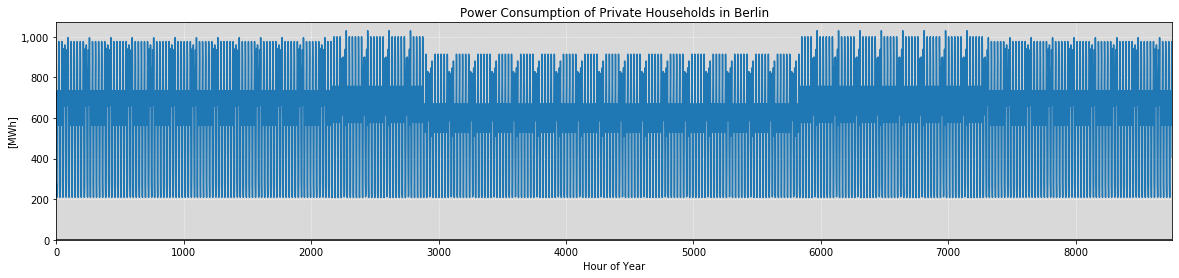

In [20]:
fig, ax = plt.subplots(figsize=(20, 4))
df_elc_tempo_ZVE['DE300'].plot(ax=ax)
plot.set_ax_format(ax=ax, xlim=(0, 8760), ylim=(0, None), ylabel='[MWh]', xlabel='Hour of Year',
                   axtitle='Power Consumption of Private Households in Berlin')

This depictation however does not provide a good visualization of what is happening on shorter timescales, i.e. within one day.

Therefore, we choose to plot it as a heatmap:

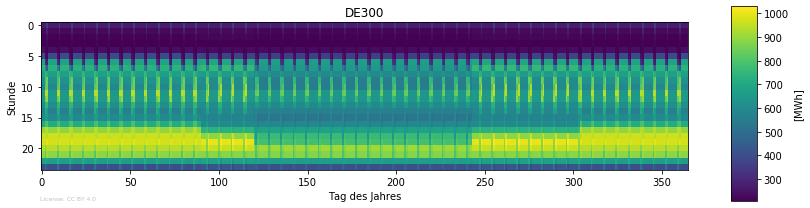

In [21]:
fig, ax = plot.heatmap_timeseries(df_elc_tempo_ZVE['DE300'], clabel='[MWh]')

# Power by 'Standard Load Profiles' (SLP)

This one doesn't need to be created by the user, since we've already put the one ready-to-download into the database. Just get it via:

In [22]:
df_elc_tempo_SLP = data.elc_consumption_HH_spatiotemporal()
df_elc_tempo_SLP

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
2015-01-01 00:00:00,58.318736,35.649305,49.005230,23.631721,49.935262,39.218620,11.459864,31.264867,10.301788,17.915673,...,10.249335,7.678774,5.312413,10.217359,8.058098,7.755817,9.454035,8.634050,3.965937,11.748588
2015-01-01 01:00:00,43.156465,26.380852,36.264375,17.487717,36.952608,29.022183,8.480417,23.136323,7.623429,13.257783,...,7.584614,5.682371,3.931240,7.560951,5.963075,5.739384,6.996083,6.389286,2.934834,8.694076
2015-01-01 02:00:00,39.555926,24.179901,33.238842,16.028718,33.869656,26.600865,7.772897,21.206062,6.987407,12.151687,...,6.951830,5.208292,3.603257,6.930141,5.465577,5.260548,6.412400,5.856229,2.689982,7.968730
2015-01-01 03:00:00,38.515770,23.544070,32.364799,15.607230,32.979025,25.901373,7.568502,20.648431,6.803668,11.832149,...,6.769026,5.071335,3.508507,6.747907,5.321855,5.122217,6.243781,5.702234,2.619246,7.759186
2015-01-01 04:00:00,39.135863,23.923123,32.885863,15.858502,33.509978,26.318378,7.690353,20.980865,6.913205,12.022643,...,6.878005,5.152982,3.564993,6.856547,5.407535,5.204684,6.344304,5.794039,2.661415,7.884106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,187.108029,114.376127,157.226864,75.819282,160.210751,125.827808,36.767473,100.309232,33.051938,57.480092,...,32.883650,24.636339,17.044182,32.781057,25.853352,24.883522,30.332032,27.701220,12.724191,37.693806
2015-12-31 20:00:00,168.265206,102.857812,141.393242,68.183857,144.076634,113.156246,33.064783,90.207532,29.723423,51.691526,...,29.572083,22.155323,15.327738,29.479822,23.249776,22.377612,27.277427,24.911553,11.442794,33.897830
2015-12-31 21:00:00,140.991121,86.185603,118.474829,57.131944,120.723271,94.814764,27.705316,75.585805,24.905558,43.312853,...,24.778748,18.564169,12.843267,24.701441,19.481222,18.750428,22.856033,20.873643,9.588033,28.403335
2015-12-31 22:00:00,116.687480,71.329178,98.052482,47.283705,99.913344,78.470870,22.929554,62.556543,20.612410,35.846709,...,20.507459,15.364132,10.629382,20.443479,16.123106,15.518284,18.916176,17.275505,7.935275,23.507250


... and can then be plotted directly:

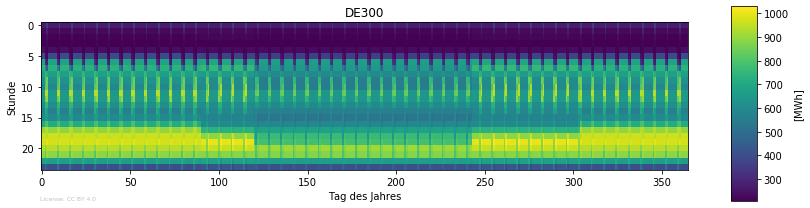

In [23]:
fig, ax = plot.heatmap_timeseries(df_elc_tempo_ZVE['DE300'], clabel='[MWh]')

# Gas by 'Standard Load Profiles' (SLP)

Get regional disaggregated gas dataset (we sum horizontally over the 3 applications for gas in households):

In [24]:
df_gas = spatial.disagg_households_gas().sum(axis=1)
df_gas

disaggregator.spatial: INFO     Calculating regional gas demands top-down.


nuts3
DE111    1.308427e+06
DE112    9.118709e+05
DE113    1.250555e+06
DE114    6.537529e+05
DE115    1.328995e+06
             ...     
DEG0K    2.206479e+05
DEG0L    2.950530e+05
DEG0M    2.273164e+05
DEG0N    1.203913e+05
DEG0P    3.550783e+05
Length: 401, dtype: float64

Get the gas standard load profile for _single family houses_ (EFH) - to obtain the one for _multi family houses_ (MFH) just pass `typ='MFH'` into the function:

In [25]:
df_temp = data.standard_load_profile_gas(typ='EFH')
df_temp

disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P,DE91C
2015-01-01 00:00:00,0.000175,0.000172,0.000181,0.000177,0.000180,0.000181,0.000153,0.000157,0.000155,0.000150,...,0.000136,0.000130,0.000134,0.000134,0.000133,0.000131,0.000135,0.000129,0.000131,0.000125
2015-01-01 01:00:00,0.000178,0.000174,0.000184,0.000180,0.000183,0.000184,0.000158,0.000162,0.000160,0.000155,...,0.000140,0.000132,0.000138,0.000138,0.000137,0.000135,0.000139,0.000133,0.000135,0.000128
2015-01-01 02:00:00,0.000183,0.000177,0.000187,0.000184,0.000187,0.000187,0.000161,0.000164,0.000162,0.000157,...,0.000143,0.000135,0.000141,0.000141,0.000140,0.000138,0.000142,0.000135,0.000137,0.000131
2015-01-01 03:00:00,0.000193,0.000186,0.000197,0.000194,0.000197,0.000197,0.000174,0.000177,0.000175,0.000169,...,0.000154,0.000143,0.000152,0.000151,0.000150,0.000149,0.000153,0.000145,0.000148,0.000141
2015-01-01 04:00:00,0.000224,0.000208,0.000222,0.000221,0.000222,0.000222,0.000207,0.000203,0.000201,0.000194,...,0.000179,0.000164,0.000180,0.000178,0.000179,0.000177,0.000182,0.000171,0.000172,0.000167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,0.000260,0.000235,0.000273,0.000242,0.000271,0.000260,0.000275,0.000275,0.000260,0.000255,...,0.000259,0.000229,0.000261,0.000253,0.000261,0.000264,0.000270,0.000239,0.000255,0.000239
2015-12-31 20:00:00,0.000250,0.000228,0.000263,0.000234,0.000262,0.000251,0.000264,0.000266,0.000252,0.000247,...,0.000250,0.000220,0.000250,0.000244,0.000250,0.000253,0.000260,0.000231,0.000246,0.000230
2015-12-31 21:00:00,0.000221,0.000204,0.000235,0.000208,0.000234,0.000225,0.000235,0.000238,0.000226,0.000221,...,0.000223,0.000196,0.000223,0.000217,0.000222,0.000226,0.000231,0.000205,0.000219,0.000205
2015-12-31 22:00:00,0.000158,0.000149,0.000172,0.000151,0.000171,0.000164,0.000169,0.000175,0.000165,0.000162,...,0.000163,0.000151,0.000161,0.000169,0.000160,0.000174,0.000166,0.000160,0.000172,0.000148


This dataframe has the NUTS-3-regions in columns and the timesteps in rows. Though being intuitive that way, the function ` temporal.disagg_temporal(df_spat, df_temp)` requires us to provide the temporal dataset _NUTS-3-index'ed_ (i.e. with timesteps in columns) for compatibility reasons. To achieve that, we use the function `data.transpose_spatiotemporal()`

In [26]:
df_temp = data.transpose_spatiotemporal(df_temp)
df_temp

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
nuts3,,,,,,,,,,,,,,,,,,,,,
DE111,0.000175,0.000178,0.000183,0.000193,0.000224,0.000290,0.000369,0.000342,0.000334,0.000324,...,0.000230,0.000237,0.000248,0.000258,0.000261,0.000260,0.000250,0.000221,0.000158,0.000126
DE112,0.000172,0.000174,0.000177,0.000186,0.000208,0.000267,0.000358,0.000326,0.000312,0.000304,...,0.000205,0.000209,0.000223,0.000233,0.000235,0.000235,0.000228,0.000204,0.000149,0.000119
DE113,0.000181,0.000184,0.000187,0.000197,0.000222,0.000286,0.000378,0.000346,0.000333,0.000324,...,0.000239,0.000244,0.000259,0.000270,0.000273,0.000273,0.000263,0.000235,0.000172,0.000137
DE114,0.000177,0.000180,0.000184,0.000194,0.000221,0.000284,0.000371,0.000341,0.000330,0.000320,...,0.000213,0.000218,0.000230,0.000240,0.000243,0.000242,0.000234,0.000208,0.000151,0.000120
DE115,0.000180,0.000183,0.000187,0.000197,0.000222,0.000285,0.000377,0.000345,0.000332,0.000323,...,0.000237,0.000242,0.000257,0.000268,0.000271,0.000271,0.000262,0.000234,0.000171,0.000136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0L,0.000131,0.000135,0.000138,0.000149,0.000177,0.000254,0.000328,0.000305,0.000289,0.000277,...,0.000243,0.000247,0.000262,0.000266,0.000267,0.000264,0.000253,0.000226,0.000174,0.000149
DEG0M,0.000135,0.000139,0.000142,0.000153,0.000182,0.000262,0.000338,0.000314,0.000298,0.000286,...,0.000238,0.000245,0.000257,0.000268,0.000271,0.000270,0.000260,0.000231,0.000166,0.000133
DEG0N,0.000129,0.000133,0.000135,0.000145,0.000171,0.000245,0.000319,0.000296,0.000280,0.000269,...,0.000220,0.000223,0.000237,0.000241,0.000242,0.000239,0.000231,0.000205,0.000160,0.000137


Note: It is by design that the pd.DateTimeIndex gets lost while transposing this way for a better handling of the data. The former index is being recovered, one it is transposed again.

In [27]:
df_gas_st = temporal.disagg_temporal(df_gas, df_temp, time_indexed=True)
df_gas_st

nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
0,229.187891,156.629763,226.396461,115.845703,239.793763,195.352529,50.300808,135.963563,44.459984,77.960369,...,40.301243,33.925784,24.105669,41.241540,29.119225,29.263304,38.732547,30.727088,15.489708,46.361817
1,232.700349,158.376563,229.788168,117.594318,243.386179,198.279158,51.825075,140.572498,45.967102,80.603094,...,40.909563,35.085640,24.472295,42.491283,29.994051,30.150071,39.906260,31.658212,15.955064,47.946836
2,239.725265,161.287897,234.027802,120.217239,247.876699,201.937445,52.913837,142.300848,46.532272,81.594115,...,41.822044,35.665568,25.113891,43.383957,30.618927,30.783476,40.744627,32.323300,16.287462,48.739346
3,252.896983,169.439632,246.746704,126.774543,261.348258,212.912306,57.051133,153.247067,50.111677,87.870586,...,44.103247,38.420226,26.488739,46.776119,32.868481,33.190414,43.930421,34.850637,17.484091,52.503767
4,293.290251,189.818969,278.119997,144.260687,294.578106,239.983631,67.721002,176.291739,57.647268,101.084208,...,50.186453,44.654451,30.429970,55.524324,38.742316,39.397782,52.146416,41.368504,20.608625,61.023246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,340.653424,214.374436,340.786871,158.414531,360.009361,280.644247,90.210701,238.584954,74.513336,133.006486,...,69.870825,64.640211,42.363404,80.490248,55.107634,57.490185,77.811058,61.426908,28.814463,90.396442
8756,326.487638,207.582374,329.314838,152.768073,347.890234,271.196817,86.638000,231.025827,72.152517,128.792420,...,67.421744,62.464204,40.703806,77.302515,53.176027,55.213346,74.762790,58.994159,27.804472,87.414291
8757,289.386770,185.932679,294.223913,135.828697,310.819963,242.298796,76.991708,206.931109,64.627408,115.360081,...,59.930439,55.808182,36.249098,68.695637,47.267579,49.065880,66.580596,52.425738,24.715086,77.908686
8758,207.090299,136.265730,214.594505,98.499332,226.698964,176.722516,55.555501,151.654991,47.363922,84.544717,...,46.676592,40.704133,27.951112,49.569242,36.814172,35.404846,51.339255,37.829245,19.249250,60.947704


Instead of selecting one specific region, this time we choose to sum it up for the entire country:

In [28]:
ser_gas = df_gas_st.sum(axis=1)

Now we can plot this one again as well:

Text(0.5, 1, 'Gas Load Private Households Germany')

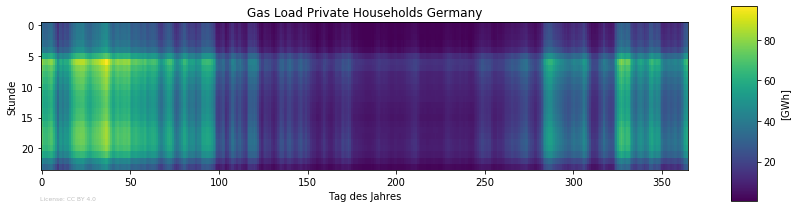

In [29]:
fig, ax = plot.heatmap_timeseries(ser_gas/1e3, clabel='[GWh]')
ax[0, 0].set_title('Gas Load Private Households Germany')